In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


### Importing Required Libraries

In [2]:
import pandas as pd
import numpy
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import seaborn as sns

In [3]:
# Verinin Okunduğu yer
df=pd.read_csv('/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv')
df_copy=df.copy()

In [4]:
# Verinin ilk 5 örneği
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### EDA

In [5]:
# Veri keşfetme
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
# Veri setinin boyutu hakkında bilgi
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n' 
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [7]:
#Eksik veri gözlemlenmesi
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
# Veri seti hakkında özet tablo
pd.options.display.float_format = '{:.2f}'.format  # İki ondalık hane göstermek için
df_copy.describe().T


,count,mean,std,min,25%,50%,75%,max
Rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


In [9]:
# Veri setinde tekrar eden veri kontrol etme
df_copy.duplicated().sum()

1

In [10]:
#Tekrar eden verinin erişilmesi
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,...,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,...,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [11]:
# tekrar eden verinin kaldırılması
df_copy.drop_duplicates(keep='first', inplace=True)
df_copy.duplicated().sum()

0

In [13]:
# Eksik veri kontrol kısmı
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
# Kategorik olanlar ile Kategorik olmayan kolonları ayrıldı
un_kategorik=[]
kategorik=[]
for i in df.columns:
    a=df[i].nunique()# kategorik değişken ayracı
    if a>16:
        un_kategorik.append(i)
    else:
        kategorik.append(i)

In [15]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

<Axes: ylabel='BuildingArea'>

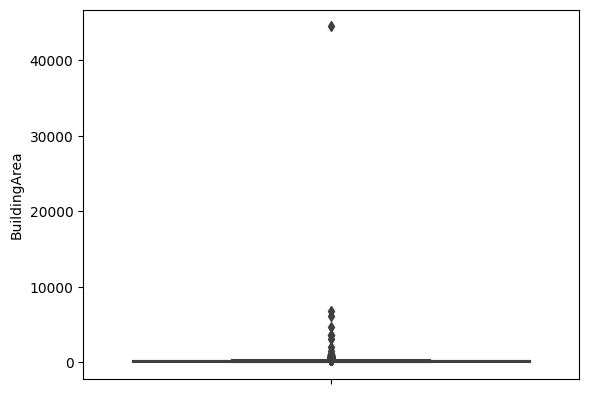

In [16]:
# Aykırı değer görselleştirilmesi
sns.boxplot(y="BuildingArea", data=df_copy)

<Axes: ylabel='Landsize'>

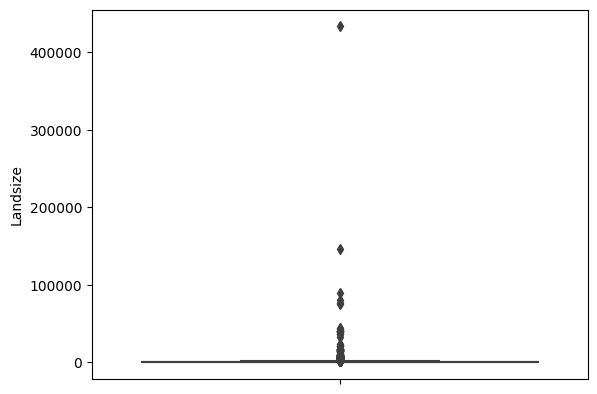

In [17]:
# Aykırı değer görselleştirilmesi
sns.boxplot(y="Landsize", data=df_copy)

In [18]:
len(df)

34857

In [19]:
### Z Score ##############
# Z-puanı hesaplamak için bir fonksiyon tanımlayalım
def detect_outliers_zscore(data):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > 0.75  # Eşik değeri burada 1 olarak kabul edilmiştir.

# 'Landsize' ve 'BuildingArea' sütunları için Z-puanları hesaplayalım
outliers_landsize = detect_outliers_zscore(df['Landsize'])
outliers_buildingarea = detect_outliers_zscore(df['BuildingArea'])

# Veri setinden outlierları kaldıralım
df_copy = df_copy[~(outliers_landsize | outliers_buildingarea)]

# Temizlenmiş veriyi yazdıralım
(df_copy)

/tmp/ipykernel_32/1000599323.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_copy = df_copy[~(outliers_landsize | outliers_buildingarea)]


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,...,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,...,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,...,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00


<Axes: ylabel='Landsize'>

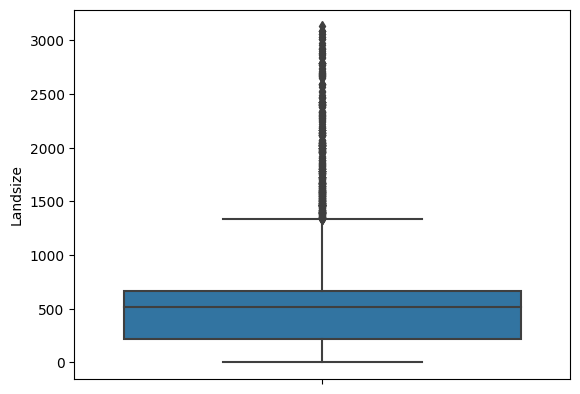

In [20]:
# Aykırı değerlerin elenmesi sonrası aykırı değer görselleştirilmesi
sns.boxplot(y="Landsize", data=df_copy)

<Axes: ylabel='BuildingArea'>

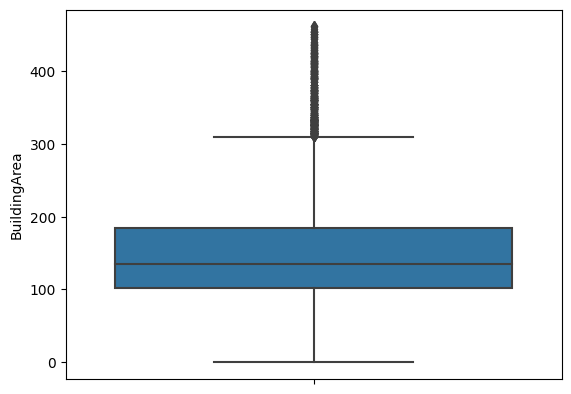

In [21]:
# Aykırı değerlerin elenmesi sonrası aykırı değer görselleştirilmesi
sns.boxplot(y="BuildingArea", data=df_copy)

In [22]:
#Kategorik veri türüne dönüştürme işlemi gerçekleştirildi
df_copy[kategorik] = df_copy[kategorik].astype('category')

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34487 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34487 non-null  object  
 1   Address        34487 non-null  object  
 2   Rooms          34487 non-null  category
 3   Type           34487 non-null  category
 4   Price          26969 non-null  float64 
 5   Method         34487 non-null  category
 6   SellerG        34487 non-null  object  
 7   Date           34487 non-null  object  
 8   Distance       34486 non-null  float64 
 9   Postcode       34486 non-null  float64 
 10  Bedroom2       26270 non-null  category
 11  Bathroom       26261 non-null  category
 12  Car            25772 non-null  category
 13  Landsize       22697 non-null  float64 
 14  BuildingArea   13492 non-null  float64 
 15  YearBuilt      15319 non-null  float64 
 16  CouncilArea    34484 non-null  object  
 17  Lattitude      26511 non-null  float

### VISUALIZATION

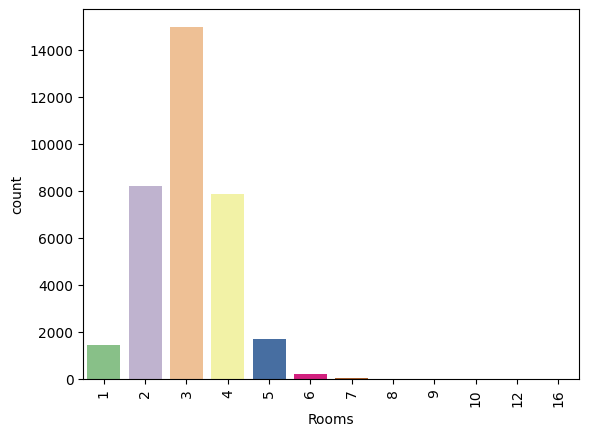

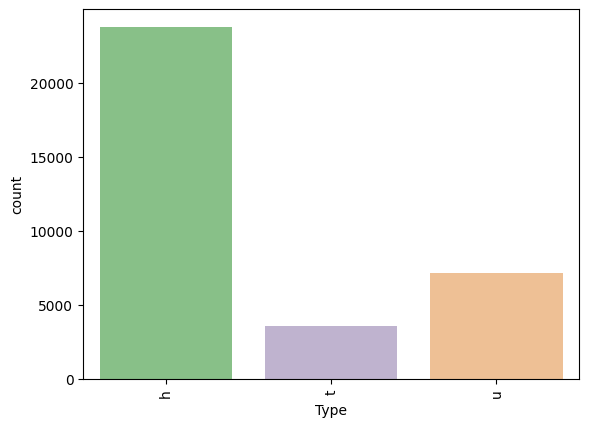

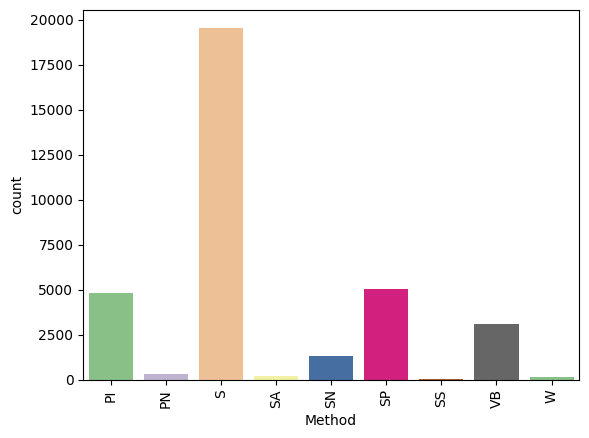

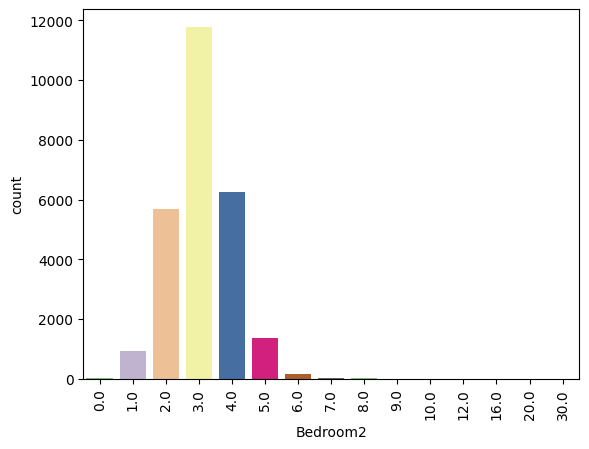

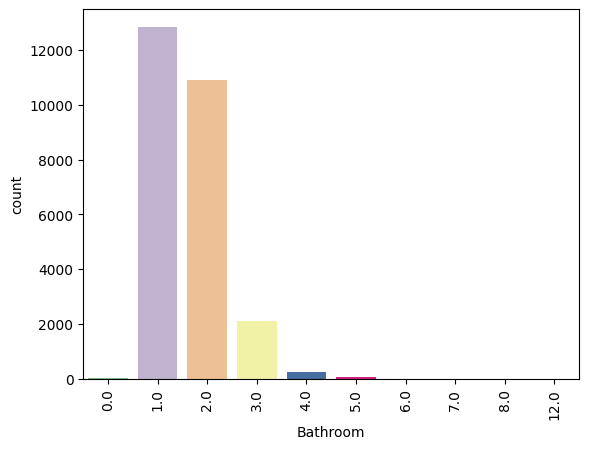

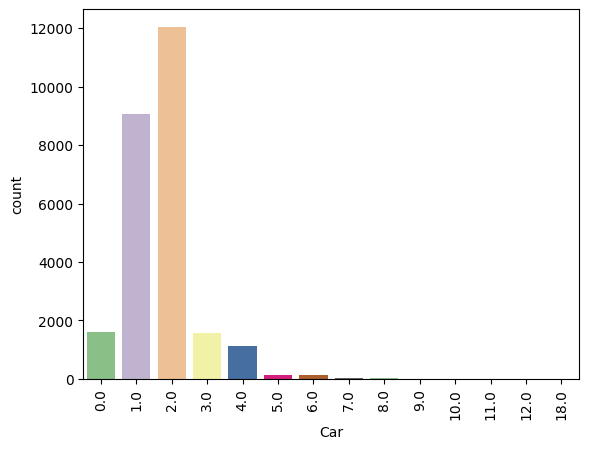

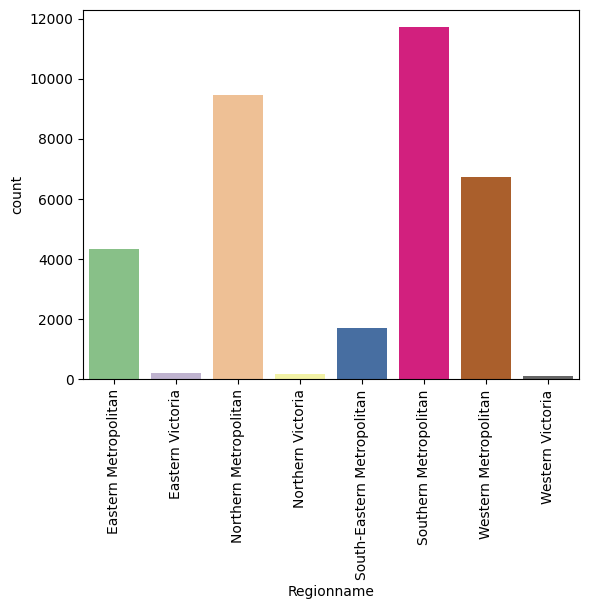

In [24]:
# Her kategorik değişken için görselleştirme yapıldı
for i in kategorik:
    sns.countplot(data=df_copy, 
                       x=df_copy[i], 
                       palette='Accent')
    plt.xticks(rotation=90)
    plt.show()

In [25]:
#Kategorik olmayan verileri gözlemlenmesi
df_copy[un_kategorik]

,Suburb,Address,Price,SellerG,Date,Distance,Postcode,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount
0,Abbotsford,68 Studley St,NaN,Jellis,3/09/2016,2.50,3067.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,4019.00
1,Abbotsford,85 Turner St,1480000.00,Biggin,3/12/2016,2.50,3067.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,4019.00
2,Abbotsford,25 Bloomburg St,1035000.00,Biggin,4/02/2016,2.50,3067.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,4019.00
3,Abbotsford,18/659 Victoria St,NaN,Rounds,4/02/2016,2.50,3067.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,4019.00
4,Abbotsford,5 Charles St,1465000.00,Biggin,4/03/2017,2.50,3067.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,1480000.00,Jas,24/02/2018,6.30,3013.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,6543.00
34853,Yarraville,29A Murray St,888000.00,Sweeney,24/02/2018,6.30,3013.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,6543.00
34854,Yarraville,147A Severn St,705000.00,Jas,24/02/2018,6.30,3013.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,6543.00
34855,Yarraville,12/37 Stephen St,1140000.00,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,6543.00


In [26]:
#obje tipindeki verilerin ayrılması
type_object=(df[un_kategorik].select_dtypes(include=['object'])).columns

In [27]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


In [28]:
# numeric kolonların ayrılması
saf_sayisal = [x for x in un_kategorik if x not in type_object]

In [29]:
# kategorik olmayan kolonların değerlerinin gözlemlenmesi
for i in un_kategorik:
    print(df[i].value_counts())
    print("""
    #################
    """)

Suburb
Reservoir          844
Bentleigh East     583
Richmond           552
Glen Iris          491
Preston            485
                  ... 
Belgrave             1
Cranbourne East      1
Yarra Glen           1
Olinda               1
Menzies Creek        1
Name: count, Length: 351, dtype: int64

    #################
    
Address
5 Charles St        6
25 William St       4
57 Bay Rd           3
5 Margaret St       3
16 Smith St         3
                   ..
17 Fraser St        1
11a Bewdley St      1
6/13 Ulupna Rd      1
428 North Rd        1
3 Tarrengower St    1
Name: count, Length: 34009, dtype: int64

    #################
    
Price
1100000.00    235
600000.00     235
650000.00     219
800000.00     217
1300000.00    210
             ... 
1452000.00      1
2555000.00      1
949500.00       1
426500.00       1
1605500.00      1
Name: count, Length: 2871, dtype: int64

    #################
    
SellerG
Jellis             3359
Nelson             3236
Barry              3235
ho

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

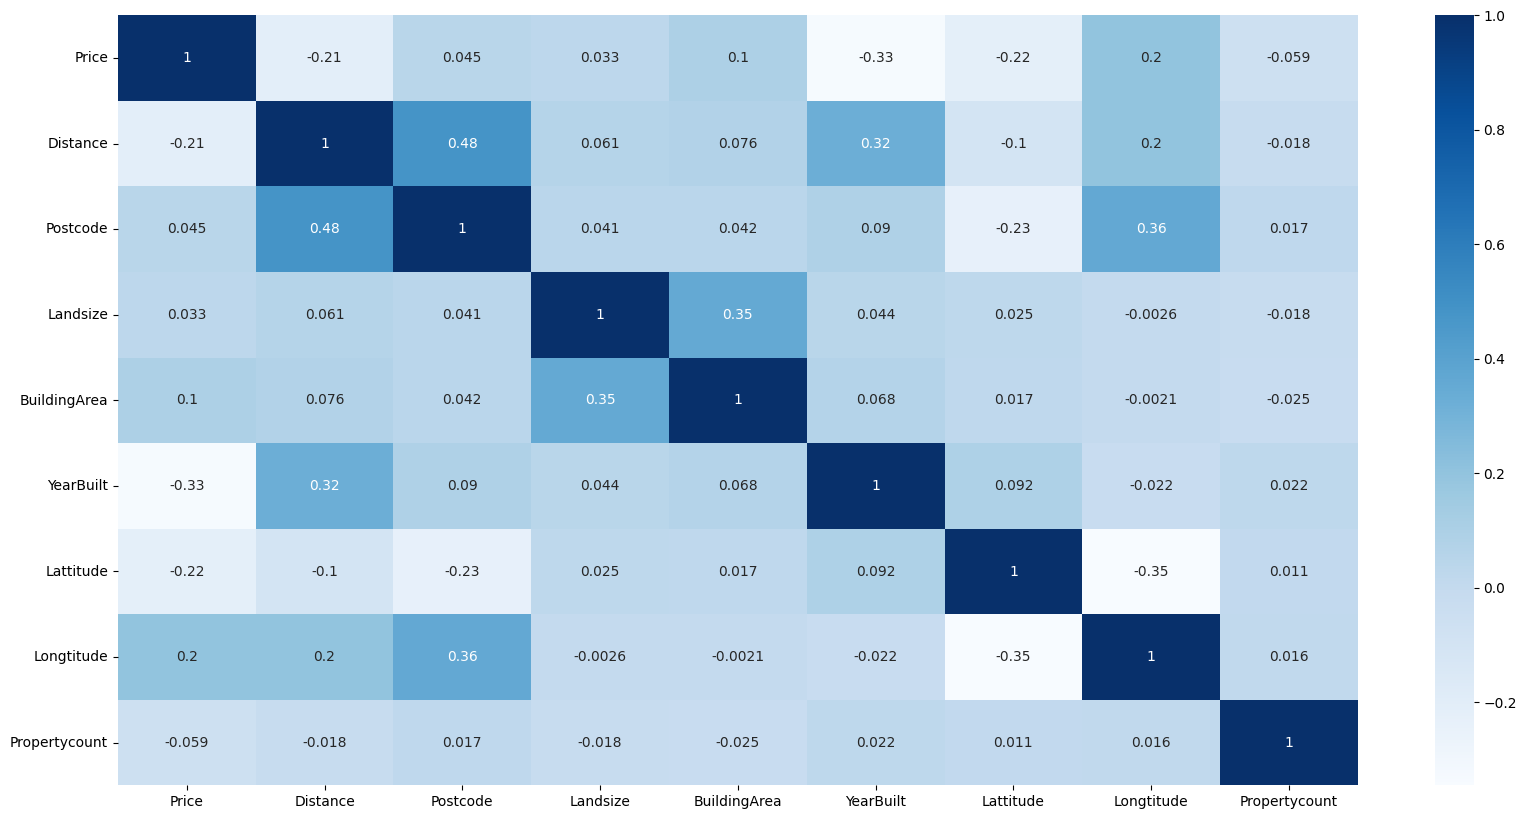

In [31]:
# Korelasyonların ısı haritası ile görselleştirilmesi
corr = df[saf_sayisal].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

In [32]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1).sort_values(by='Number of Missing Values',ascending=False))

               Number of Missing Values  Ratio of Missing Values
BuildingArea                      20995                    60.88
YearBuilt                         19168                    55.58
Landsize                          11790                    34.19
Car                                8715                    25.27
Bathroom                           8226                    23.85
Bedroom2                           8217                    23.83
Longtitude                         7976                    23.13
Lattitude                          7976                    23.13
Price                              7518                    21.80
Regionname                            3                     0.01
CouncilArea                           3                     0.01
Propertycount                         3                     0.01
Postcode                              1                     0.00
Distance                              1                     0.00
Address                  

In [33]:
# Eksik değerlerin veri setine yüzdelik oranı gösterildi 
nun_ratio=((df.isnull().sum() / len(df)).round(4)*100).sort_values(ascending=False)
nun_ratio

BuildingArea    60.58
YearBuilt       55.39
Landsize        33.88
Car             25.04
Bathroom        23.60
Bedroom2        23.57
Longtitude      22.88
Lattitude       22.88
Price           21.83
Regionname       0.01
CouncilArea      0.01
Propertycount    0.01
Address          0.00
Postcode         0.00
Distance         0.00
Date             0.00
SellerG          0.00
Method           0.00
Type             0.00
Rooms            0.00
Suburb           0.00
dtype: float64

In [34]:
# Kolonlarda yüksek oranda eksik veriye sahip olan ilk 3 kolon veri setinden çıkarıldı
for i in nun_ratio[0:3].index:
    print(i)
    df_copy.drop([i],axis=1,inplace=True)

BuildingArea
YearBuilt
Landsize


In [35]:
df_copy.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

In [36]:
# Kolonlardaki benzersiz değerler listelendi
nunique_value=df_copy.nunique().sort_values(ascending=True)
nunique_value

Type                 3
Regionname           8
Method               9
Bathroom            10
Rooms               12
Car                 14
Bedroom2            15
CouncilArea         33
Date                78
Postcode           208
Distance           213
Propertycount      337
Suburb             345
SellerG            387
Price             2853
Lattitude        13284
Longtitude       14380
Address          33652
dtype: int64

In [37]:
# ilk 7 kolon feature extraction için seçildi
nunique_value[0:7].index

Index(['Type', 'Regionname', 'Method', 'Bathroom', 'Rooms', 'Car', 'Bedroom2'], dtype='object')

In [38]:
# Seçilen ilk 7 kolonun hangi etiket değerlerine sahip olduğu gözlemlendi
for i in nunique_value[0:7].index:
    print(df_copy[i].value_counts())
    print("""
    ##############################
    """)

Type
h    23748
u     7178
t     3561
Name: count, dtype: int64

    ##############################
    
Regionname
Southern Metropolitan         11703
Northern Metropolitan          9462
Western Metropolitan           6745
Eastern Metropolitan           4332
South-Eastern Metropolitan     1721
Eastern Victoria                218
Northern Victoria               189
Western Victoria                114
Name: count, dtype: int64

    ##############################
    
Method
S     19564
SP     5032
PI     4787
VB     3070
SN     1308
PN      304
SA      222
W       166
SS       34
Name: count, dtype: int64

    ##############################
    
Bathroom
1.0     12840
2.0     10903
3.0      2130
4.0       253
5.0        69
0.0        46
6.0        13
7.0         3
8.0         3
12.0        1
Name: count, dtype: int64

    ##############################
    
Rooms
3     14987
2      8235
4      7872
5      1686
1      1455
6       194
7        28
8        17
10        5
9         4
12   

In [39]:
# 'Lattitude','Longtitude' özelliklerinin bilgilerini içeren farklı bir değişkenizim olduğu için çıkarılma işlemi yapıldı
df_copy.drop(['Lattitude','Longtitude'],axis=1,inplace=True)

In [40]:
df_copy.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,Yarra City Council,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,Yarra City Council,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,Yarra City Council,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,Yarra City Council,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,Yarra City Council,Northern Metropolitan,4019.00


In [41]:
df[kategorik].head()

,Rooms,Type,Method,Bedroom2,Bathroom,Car,Regionname
0,2,h,SS,2.00,1.00,1.00,Northern Metropolitan
1,2,h,S,2.00,1.00,1.00,Northern Metropolitan
2,2,h,S,2.00,1.00,0.00,Northern Metropolitan
3,3,u,VB,3.00,2.00,1.00,Northern Metropolitan
4,3,h,SP,3.00,2.00,0.00,Northern Metropolitan


### Eksik verilerin Doldurulması

In [42]:
((df_copy.isnull().sum() / len(df_copy)).round(4)*100).sort_values(ascending=False)

Car             25.27
Bathroom        23.85
Bedroom2        23.83
Price           21.80
CouncilArea      0.01
Regionname       0.01
Propertycount    0.01
Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
dtype: float64

In [43]:
#Price kolonunda nan olan satırları verimizden çıkardık
df_copy.dropna(subset=['Price'], inplace=True)

In [44]:
# Tüm kolonların mod değerlerini alındı
sutun_modlari = df_copy.mode().iloc[0]
# Tüm kolonlar mod değerlerine göre dolduruldu
for sutun in df_copy.columns:
    df_copy[sutun].fillna(sutun_modlari[sutun], inplace=True)
sutun_modlari

Suburb                         Reservoir
Address                     5 Charles St
Rooms                                  3
Type                                   h
Price                          600000.00
Method                                 S
SellerG                           Nelson
Date                          28/10/2017
Distance                           11.20
Postcode                         3073.00
Bedroom2                            3.00
Bathroom                            1.00
Car                                 2.00
CouncilArea      Boroondara City Council
Regionname         Southern Metropolitan
Propertycount                   21650.00
Name: 0, dtype: object

### Feature extraction

#### Rooms 
kolonu için için 9 dan büyük değerler tek bir değere indirgendi

In [47]:
df_copy['Rooms'].value_counts()

Rooms
3     11879
2      6711
4      5857
1      1179
5      1177
6       130
7        16
8        12
10        4
12        2
9         1
16        1
Name: count, dtype: int64

In [48]:
def toplam_15ten_buyuk(x):
    if x >8:
        return 'other'
    else:
        return x
        
df_copy['Rooms'] = df_copy['Rooms'].apply(toplam_15ten_buyuk)

In [49]:
df_copy['Rooms'].value_counts()

Rooms
3        11879
2         6711
4         5857
1         1179
5         1177
6          130
7           16
8           12
other        8
Name: count, dtype: int64

#### Method
eksik price olan örnekler düşürldükten sonra veriye yapılması gereken bir işlem kalmadı

In [50]:
df_copy['Method'].value_counts()

Method
S     17350
SP     3565
PI     3216
VB     2652
SA      186
PN        0
SN        0
SS        0
W         0
Name: count, dtype: int64

#### Bedroom2
7 yatak odasından sonrasının veri setinde az gözlemlenmesinden dolayı hepsi toplanıp other değişken ismin toplandı

In [51]:
df_copy['Bedroom2'].value_counts()

Bedroom2
3.0     15775
4.0      4706
2.0      4622
5.0       951
1.0       763
6.0       104
0.0        16
7.0        16
8.0         8
10.0        3
9.0         2
12.0        1
16.0        1
20.0        1
30.0        0
Name: count, dtype: int64

In [52]:
def toplam_15ten_buyuk(x):
    if x >7:
        return 'other'
    else:
        return x
        
df_copy['Bedroom2'] = df_copy['Bedroom2'].apply(toplam_15ten_buyuk)

In [53]:
df_copy['Bedroom2'].value_counts()

Bedroom2
3.0      15775
4.0       4706
2.0       4622
5.0        951
1.0        763
6.0        104
0.0         16
other       16
7.0         16
Name: count, dtype: int64

#### Bathroom
4 den büyük olanların veri setinde az gözlemlenmesinden dolayı tek bir değişkende ifade edilmesine karar verildi.Şartı sağlayan veriler other değişkeninde toplandı

In [54]:
df_copy['Bathroom'].value_counts()

Bathroom
1.0     16871
2.0      8347
3.0      1502
4.0       163
5.0        40
0.0        34
6.0         8
8.0         3
7.0         1
12.0        0
Name: count, dtype: int64

In [55]:
def toplam_15ten_buyuk(x):
    if x > 4:
        return 'other'
    else:
        return x
        
df_copy['Bathroom'] = df_copy['Bathroom'].apply(toplam_15ten_buyuk)

In [56]:
df_copy['Bathroom'].value_counts()

Bathroom
1.0      16871
2.0       8347
3.0       1502
4.0        163
other       52
0.0         34
Name: count, dtype: int64

#### Car
4 den büyük olanların veri setinde az gözlemlenmesinden dolayı tek bir değişkende ifade edilmesine karar verildi.Şartı sağlayan veriler other değişkeninde toplandı

In [57]:
df_copy['Car'].value_counts()

Car
2.0     16057
1.0      7316
0.0      1242
3.0      1217
4.0       883
5.0       111
6.0       100
7.0        18
8.0        16
10.0        5
9.0         2
11.0        1
18.0        1
12.0        0
Name: count, dtype: int64

In [58]:
# Şartı sağlayan değerleri toplamak için bir fonksiyon tanımlayalım
def toplam_15ten_buyuk(x):
    if x > 4:
        return 'other'
    else:
        return x
        
# apply fonksiyonunu kullanarak 'toplam' adında yeni bir değişken oluşturalım
df_copy['Car'] = df_copy['Car'].apply(toplam_15ten_buyuk)

In [59]:
df_copy['Car'].value_counts()

Car
2.0      16057
1.0       7316
0.0       1242
3.0       1217
4.0        883
other      254
Name: count, dtype: int64

#### Regionname
Victoria bölgesinde az gözlem olmasından dolay tüm victoriadaki gözlemler bir araya 'All Victoria ' değişkeninde toplandı.

In [61]:
df_copy['Regionname'].value_counts()

Regionname
Southern Metropolitan         8431
Northern Metropolitan         7785
Western Metropolitan          5774
Eastern Metropolitan          3240
South-Eastern Metropolitan    1329
Eastern Victoria               158
Northern Victoria              156
Western Victoria                96
Name: count, dtype: int64

In [62]:
#df_copy[df_copy['Regionname']== type(object)]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Propertycount


In [65]:
def toplam_15ten_buyuk(x):
    if 'victoria' in x.lower():
        return 'All Victoria'
    return x
        
df_copy['Regionname'] = df_copy['Regionname'].apply(toplam_15ten_buyuk)

In [66]:
df_copy['Regionname'].value_counts()

Regionname
Southern Metropolitan         8431
Northern Metropolitan         7785
Western Metropolitan          5774
Eastern Metropolitan          3240
South-Eastern Metropolitan    1329
All Victoria                   410
Name: count, dtype: int64

#### Encoder

In [67]:
df_copy.drop(columns=['Suburb','Address','SellerG','Date','Postcode','CouncilArea','Propertycount'],inplace=True)

In [68]:
# tüm kategorik verilere One-Hot Encoding uygulandı
df_encoded = pd.get_dummies(df_copy, columns=kategorik,drop_first=True)
df_encoded

,Price,Distance,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,Rooms_other,...,Car_1.0,Car_2.0,Car_3.0,Car_4.0,Car_other,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan
1,1480000.00,2.50,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,1035000.00,2.50,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,1465000.00,2.50,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,850000.00,2.50,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
6,1600000.00,2.50,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,1480000.00,6.30,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
34853,888000.00,6.30,True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
34854,705000.00,6.30,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
34855,1140000.00,6.30,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True


### Model Selection

In [69]:
#Verinin nümerik olan kolonları standartlaştırıldı
scaler = StandardScaler()
num_cols=['Price','Distance']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [70]:
# Veri seti X (özellikler) ve y (hedef değişkeni) olmak üzere 2 ye ayrıldı
y = df_encoded["Price"]
X = df_encoded.drop("Price", axis=1)

In [76]:
# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model sözlüğünüzü oluşturun
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor()
    }
}

# Her bir model için hiperparametre uzaylarını tanımlayın
parametre_uzaylari = {
    'Lasso': {
        'alpha': [0.1, 1, 10]
    },
    'LinearRegression': {
        # LinearRegression modeli için hiperparametre yok
    },
    'Ridge': {
        'alpha': [0.1, 1, 10]
    },
    'ElasticNet': {
        'alpha': [0.1, 1, 10],
        'l1_ratio': [0.1, 0.5, 0.9]
    },
    'KNeighborsRegressor': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'AdaBoostRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.5, 1.0]
    }
}

# Model sonuçlarını ve en iyi hiperparametreleri saklamak için bir sözlük oluşturun
best_model_results = {}

for model_name, model_info in models.items():
    model = model_info['model']
    parametre_uzayi = parametre_uzaylari.get(model_name, {})  # Model için hiperparametre uzayını alın
    grid_search = GridSearchCV(model, parametre_uzayi, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE hesaplama
    r2 = r2_score(y_test, y_pred)
    best_model_results[model_name] = {
        'model': best_model,
        'mse': mse,
        'mae': mae,
        'rmse': rmse,
        'r2': r2,
        'best_params': grid_search.best_params_
    }

In [77]:
# En iyi model sonuçlarını yazdırın
for model_name, result in best_model_results.items():
    print(f"{model_name}:")
    print(f"Mean Squared Error (MSE) = {result['mse']}")
    print(f"Mean Absolute Error (MAE) = {result['mae']}")
    print(f"Root Mean Squared Error (RMSE) = {result['rmse']}")
    print(f"R-squared (R2) = {result['r2']}")
    print(f"Best Parameters: {result['best_params']}")
    print("""
    ###############################
    """)

Lasso:
Mean Squared Error (MSE) = 0.7996195427329645
Mean Absolute Error (MAE) = 0.5925196073479432
Root Mean Squared Error (RMSE) = 0.8942144836296069
R-squared (R2) = 0.23439069662616185
Best Parameters: {'alpha': 0.1}

    ###############################
    
LinearRegression:
Mean Squared Error (MSE) = 0.4513060039040672
Mean Absolute Error (MAE) = 0.4381342304136703
Root Mean Squared Error (RMSE) = 0.6717931258237667
R-squared (R2) = 0.5678894064088521
Best Parameters: {}

    ###############################
    
Ridge:
Mean Squared Error (MSE) = 0.45128350869153105
Mean Absolute Error (MAE) = 0.4381324250893575
Root Mean Squared Error (RMSE) = 0.6717763829515973
R-squared (R2) = 0.5679109448319128
Best Parameters: {'alpha': 0.1}

    ###############################
    
ElasticNet:
Mean Squared Error (MSE) = 0.5758580138225615
Mean Absolute Error (MAE) = 0.47849923189490257
Root Mean Squared Error (RMSE) = 0.7588530910674092
R-squared (R2) = 0.448634970453483
Best Parameters: {'a

In [94]:
# En yüksek R^2 değerine sahip modeli bulma
best_r2_model_name = max(best_model_results, key=lambda k: best_model_results[k]['r2'])
best_model = best_model_results[best_r2_model_name]

# En yüksek R^2 değerine sahip modeli ve ilgili diğer değerleri yazdırın
print("En yüksek R^2 değerine sahip model:", best_r2_model_name)
print("R^2 Değeri:", best_model['r2'])
print("Mean Squared Error (MSE):", best_model['mse'])
print("Mean Absolute Error (MAE):", best_model['mae'])
print("Root Mean Squared Error (RMSE):", best_model['rmse'])
print("En iyi parametreler:", best_model['best_params'])


En yüksek R^2 değerine sahip model: GradientBoostingRegressor
R^2 Değeri: 0.699232848112008
Mean Squared Error (MSE): 0.3141279650102936
Mean Absolute Error (MAE): 0.32215409424354763
Root Mean Squared Error (RMSE): 0.5604711990908129
En iyi parametreler: {'learning_rate': 0.2, 'n_estimators': 300}
